# Part1

In this part I will analyze how different racial groups are impacted in terms of voting power in the House, Senate, and Electoral College. This will vary across states due to the different makeup of different states and how Senators, House Districts, and Electoral Votes are given out.

In [32]:
import pandas as pd
import requests
from bs4 import BeautifulSoup


In [163]:
district_df = pd.read_csv("district_df.csv")
district_with_dc_df = pd.read_csv("district_with_dc_df.csv")
ec_votes_df = pd.read_csv("ec_votes_df.csv")
state_df = pd.read_csv("state_df.csv")
dc_df = pd.read_csv("dc.csv")

I move California to the 0th index because I scale all the other states to the population of California. This is because California is the biggest state and the one we currently reside in.

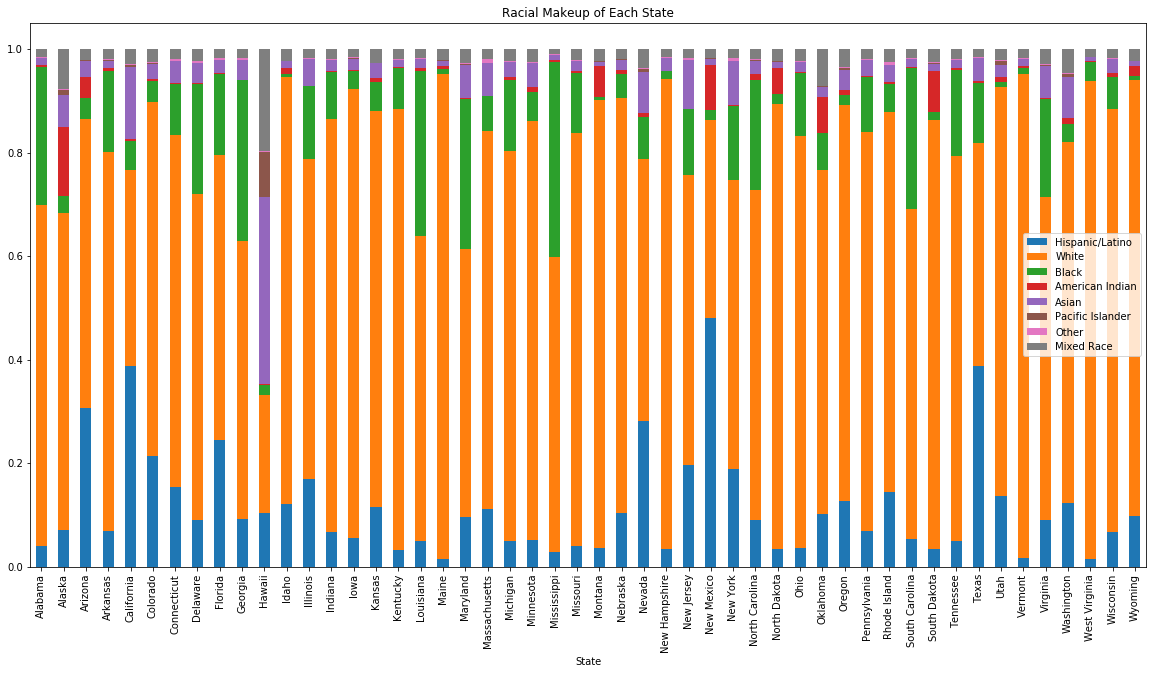

In [78]:
dems = ['Hispanic/Latino', 'White', 'Black', 'American Indian',
       'Asian', 'Pacific Islander', 'Other', 'Mixed Race']
allInfo = []
for state in range(len(state_df)):
    info = []
    info.append(state_df.loc[state]['State'])
    for x in dems:
        info.append(state_df.loc[state][x]/state_df.loc[state]['Total'])
    allInfo.append(info)

statePercents = pd.DataFrame(allInfo)
statePercents.columns = ['State','Hispanic/Latino', 'White', 'Black', 'American Indian',
       'Asian', 'Pacific Islander', 'Other', 'Mixed Race']
statePercents.plot.bar(stacked=True,x='State',figsize=(20,10),title='Racial Makeup of Each State')

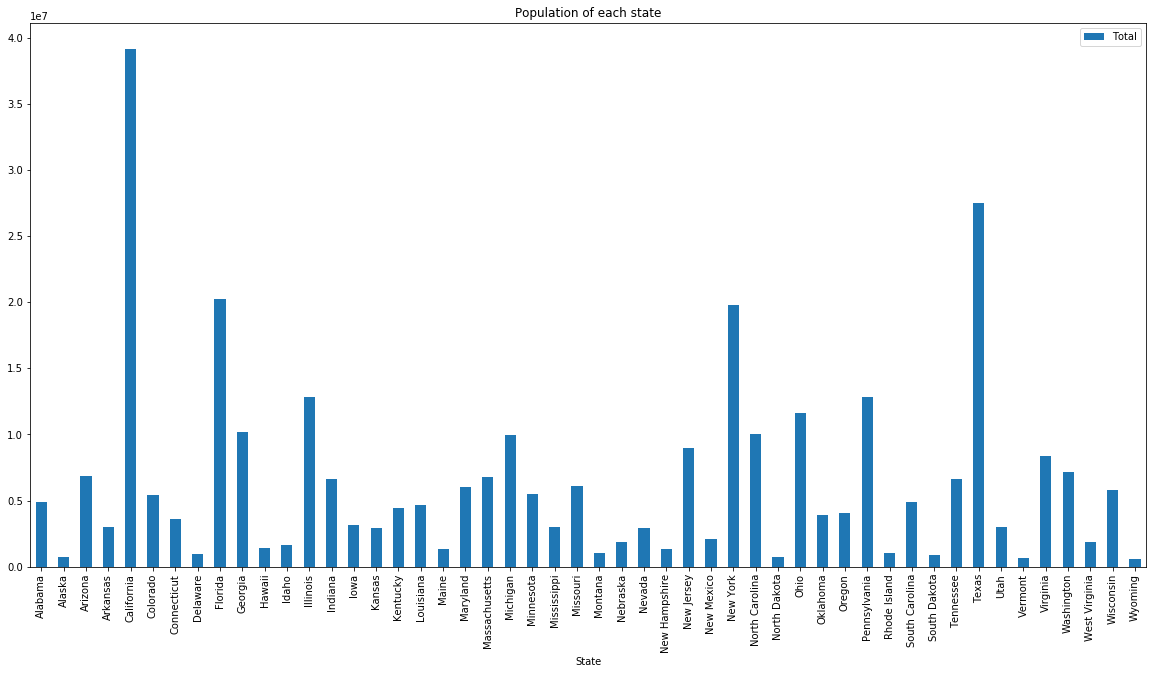

In [76]:
populations = state_df[["State","Total"]]
populations.plot.bar(x='State',figsize=(20,10),title='Population of each state')

Part A: The Senate

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


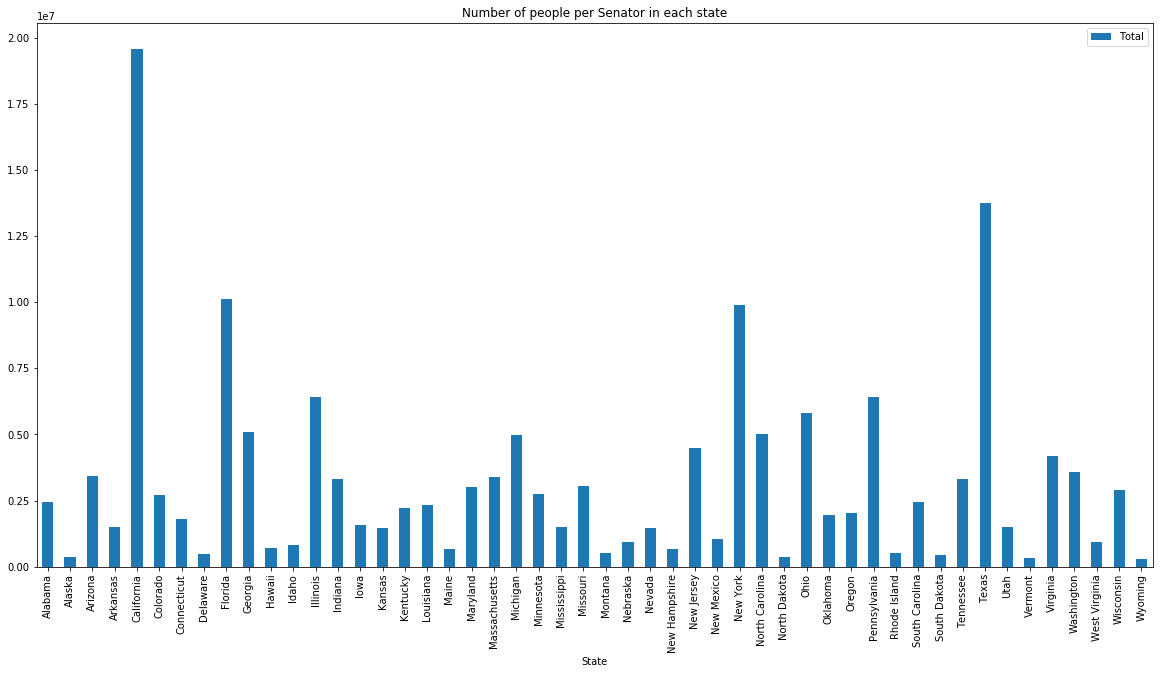

In [75]:
#Why the Senate is biased 
pop = state_df[['State','Total']]
pop['Total'] /= 2
pop.plot.bar(x='State',figsize=(20,10),title='Number of people per Senator in each state')

In [4]:
#How well are different racial groups represented in the Senate 
al = state_df.iloc[0].copy()
ca = state_df.iloc[4].copy()
state_df.loc[4] = al
state_df.loc[0] = ca
popPerSenCA = ca['Total']/2

In [5]:
demographics = ['White','Hispanic/Latino','Black','American Indian','Asian','Pacific Islander','Other','Mixed Race','Total']
percents = []
for x in demographics:
    percents.append(state_df[x].sum()/state_df['Total'].sum())

In this part I scale the population of each state to match that of California (while keep the racial makeup the same). This will allow one-to-one comparisons between states. States with lower populations (and thus have more voting power in the Senate) will have higher adjusted populations. After that I combine that different adjusted demographic populations so I can get the total amount.

In [6]:
allInfo = []
demographics = ['White','Hispanic/Latino','Black','American Indian','Asian','Pacific Islander','Other','Mixed Race','Total']
for state in range(0,len(state_df)):
    info = []
    voteWeighVsCA = (2*(state_df.loc[0]['Total'])/(state_df.loc[state]['Total']))
    info.append(state_df.loc[state]['State'])
    for x in demographics:
        info.append(state_df.loc[state][x])
        info.append(state_df.loc[state][x]*voteWeighVsCA)
    allInfo.append(info)
info_df = pd.DataFrame(allInfo)
info_df.columns = ['State','White','White Adj','Hispanic/Latino','Hispanic/Latino Adj','Black','Black Adj','American Indian',
                   'American Indian Adj','Asian','Asian Adj','Pacific Islander','Pacific Islander Adj','Other','Other Adj',
                   'Mixed Race','Mixed Race Adj','Total','Total Adj']

Now that I have the adjusted totals I recalculate the percentages to see how adjusting the population effected the adjusted totals

In [7]:
dems = ['White Adj','Hispanic/Latino Adj','Black Adj','American Indian Adj','Asian Adj','Pacific Islander Adj','Other Adj','Mixed Race Adj']
res = []
for x in dems:
    res.append(info_df[x].sum()/info_df['Total Adj'].sum())
res

[0.6950895880844663,
 0.11537067082136741,
 0.10273284779096219,
 0.014317809093256457,
 0.040437861798756684,
 0.002928625050910864,
 0.0018220377879179623,
 0.027300559572362208]

Now I compare the adjusted percentage to what the original percentage would be (this serves as an "expected" percentage).

In [8]:
allData = []
dem = ['White ','Hispanic/Latino ','Black ','American Indian ','Asian ','Pacific Islander ','Other ','Mixed Race ']
for x in range(0,len(res)):
    data = []
    print(dem[x] + 'voters have a ' + str((res[x]-percents[x])*100), end='')
    data.append(dem[x])
    data.append((res[x]-percents[x])*100)
    if(res[x]-percents[x] > 0):
        print("% higher", end='')
    else:
        print("% lower", end='')
    print(' representation compared to there actual population within the US')
    allData.append(data)

White voters have a 7.998518695993118% higher representation compared to there actual population within the US
Hispanic/Latino voters have a -6.054699824020234% lower representation compared to there actual population within the US
Black voters have a -1.9746040082992564% lower representation compared to there actual population within the US
American Indian voters have a 0.7868212916252014% higher representation compared to there actual population within the US
Asian voters have a -1.273638968892786% lower representation compared to there actual population within the US
Pacific Islander voters have a 0.13619396644818332% higher representation compared to there actual population within the US
Other voters have a -0.034893772732313% lower representation compared to there actual population within the US
Mixed Race voters have a 0.41630261987809014% higher representation compared to there actual population within the US


,% Represnetation comapred to National %
Demographic,
White,7.998519
Hispanic/Latino,-6.054700
Black,-1.974604
American Indian,0.786821
Asian,-1.273639
Pacific Islander,0.136194
Other,-0.034894
Mixed Race,0.416303


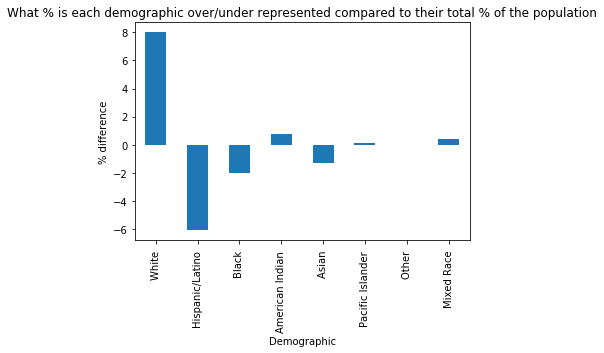

In [10]:
df = pd.DataFrame(allData)
df.columns = ['Demographic','% Represnetation comapred to National %']
df = df.set_index('Demographic')
df.plot.bar(y='% Represnetation comapred to National %',
            legend=False,title= "What % is each demographic over/under represented compared to their total % of the population").set_ylabel("% difference")
df

The senate gives each state two senators regardless of size. This gives smaller states far more voting power to elect senators. For example, California has a population of almost 40,000,000 people meaning each senator "represents" 20,000,000 people while Wyoming has just short of 600,000 people so each senator "represents" 300,000 people. This low population states tend to be disproportionately white meaning that white-Americans are better represented then other groups. On the other hand Hispanic/Latinos tend to live in large states like California and Texas which have poor Senatorial representation. Interestingly enough American Indians have a slight over representation. This is because small states like North Dakota have higher then average percents of Native Americans. 

Part B: The Electoral College

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


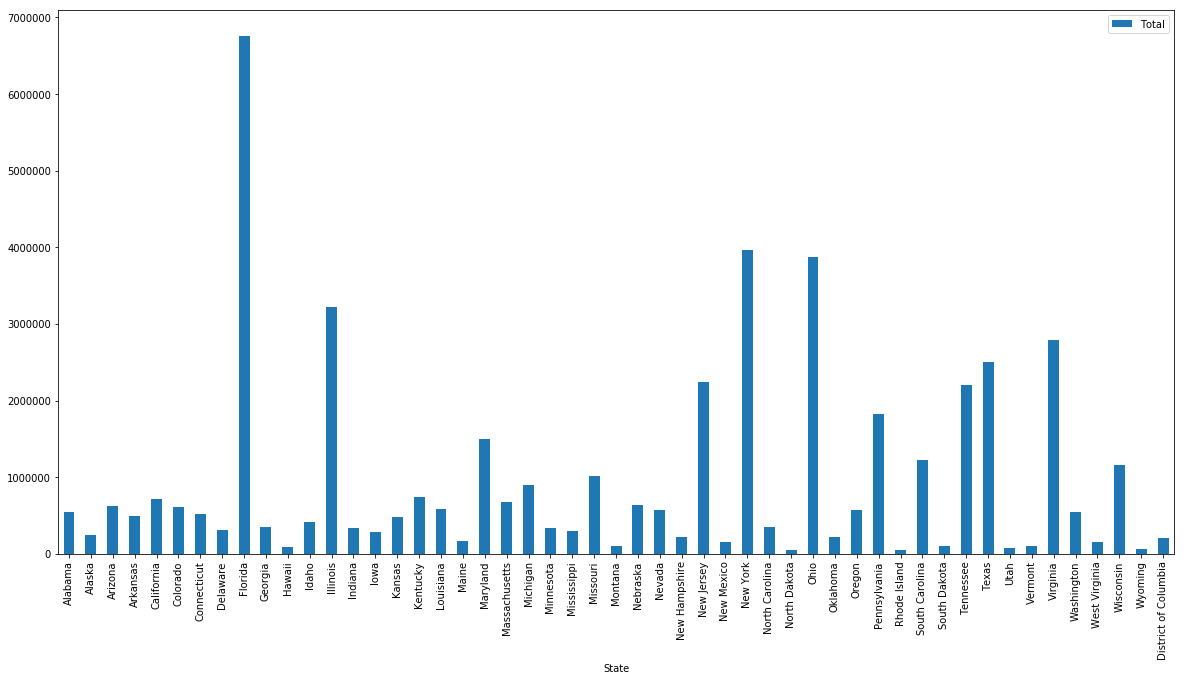

In [97]:
pop = pd.concat([state_df,dc_df],ignore_index=True)
pop['Total'] = pop['Total'] / ec_votes_df['EC Votes']
pop = pop[['Total','State']]
pop.plot.bar(x='State',figsize=(20,10))

In [164]:
pop = pd.concat([state_df,dc_df],ignore_index=True)
idx = ec_votes_df.loc[8]
ec_votes_df = ec_votes_df.drop(8)
ec_votes_df = ec_votes_df.append(idx)
ec_votes_df = ec_votes_df.reset_index()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


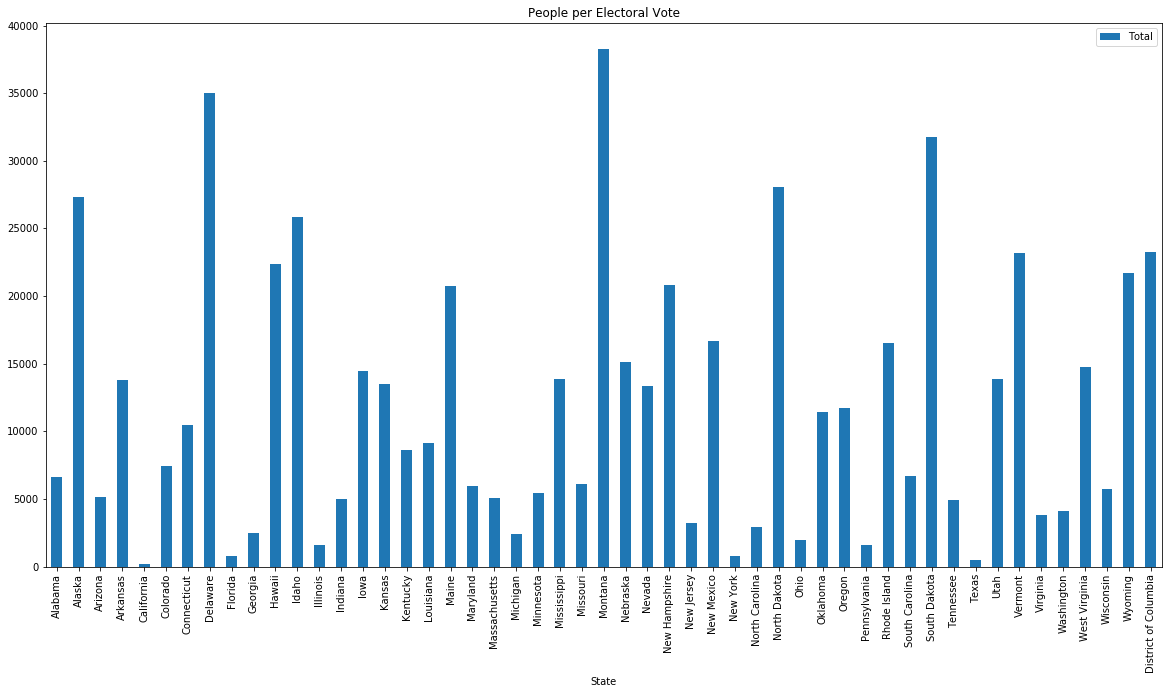

In [170]:
pop = pop[['State','Total']]
pop['Total'] /= ec_votes_df['EC Votes']
pop.plot.bar(x='State',figsize=(20,10),title='People per Electoral Vote')

In [9]:
allInfo = []
demographics = ['White','Hispanic/Latino','Black','American Indian','Asian','Pacific Islander','Other','Mixed Race','Total']
for state in range(0,len(ec_votes_df)):
    info = []
    voteWeighVsCA = ((ec_votes_df.loc[0]['Total'])/(ec_votes_df.loc[state]['Total']))
    info.append(ec_votes_df.loc[state]['State'])
    for x in demographics:
        info.append(ec_votes_df.loc[state][x])
        info.append(ec_votes_df.loc[state][x]*voteWeighVsCA)
    allInfo.append(info)
info_df = pd.DataFrame(allInfo)
info_df.columns = ['State','White','White Adj','Hispanic/Latino','Hispanic/Latino Adj','Black','Black Adj',
                   'American Indian','American Indian Adj','Asian','Asian Adj','Pacific Islander','Pacific Islander Adj','Other','Other Adj',
                   'Mixed Race','Mixed Race Adj','Total','Total Adj']

In [137]:
ec_votes_df

,State,EC Votes,American Indian,Asian,Black,District,Hispanic/Latino,Mixed Race,Other,Pacific Islander,Total,White,Voters per Pop
0,Alabama,9,19069,58918,1296681,District 1District 2District 3District 4Distri...,192870,79209,5590,2566,4858979,3204076,539886.555556
1,Alaska,3,98300,45753,24739,District (at large),51825,56801,2201,6341,738432,452472,246144.000000
2,Arizona,11,276132,210922,282718,District 1District 2District 3District 4Distri...,2098411,140705,6951,9963,6828065,3802263,620733.181818
3,Arkansas,6,18221,41932,466486,District 1District 2District 3District 4,207743,57511,3826,7551,2978204,2174934,496367.333333
4,California,55,135866,5476958,2192844,District 1District 2District 3District 4Distri...,15184545,1108262,87813,143408,39144818,14815122,711723.963636
5,Colorado,9,26239,158584,213389,District 1District 2District 3District 4Distri...,1164278,134442,13900,8499,5456574,3737243,606286.000000
6,Connecticut,7,4235,155610,355469,District 1District 2District 3District 4Distri...,553783,72150,9375,468,3590886,2439796,512983.714286
7,Delaware,3,2397,35950,200433,District (at large),85306,21966,3242,265,945934,596375,315311.333333
8,District of Columbia,3,2617,29665,321349,Non-Voting,83448,24860,36603,537,627445,211814,209148.333333
9,Florida,29,33659,534389,3145615,District 1District 2District 3District 4Distri...,4962905,357188,57413,9616,20271272,11170487,699009.379310


In [10]:
dems = ['White Adj','Hispanic/Latino Adj','Black Adj','American Indian Adj','Asian Adj','Pacific Islander Adj','Other Adj','Mixed Race Adj']
res = []
for x in dems:
    res.append((info_df[x].sum()/info_df['Total Adj'].sum()))

In [11]:
allData = []
dem = ['White ','Hispanic/Latino ','Black ','American Indian ','Asian ','Pacific Islander ','Other ','Mixed Race ']
for x in range(0,len(res)):
    data = []
    print(dem[x] + 'voters have a ' + str((res[x]-percents[x])*100), end='')
    data.append(dem[x])
    data.append((res[x]-percents[x])*100)
    if(res[x]-percents[x] > 0):
        print("% higher", end='')
    else:
        print("% lower", end='')
    print(' representation compared to there actual population within the US')
    allData.append(data)

White voters have a 7.29752299402% higher representation compared to there actual population within the US
Hispanic/Latino voters have a -6.0201393401% lower representation compared to there actual population within the US
Black voters have a -1.17181576823% lower representation compared to there actual population within the US
American Indian voters have a 0.766925359097% higher representation compared to there actual population within the US
Asian voters have a -1.2602248854% lower representation compared to there actual population within the US
Pacific Islander voters have a 0.132129705382% higher representation compared to there actual population within the US
Other voters have a 0.0759190693906% higher representation compared to there actual population within the US
Mixed Race voters have a 0.440460351379% higher representation compared to there actual population within the US


,% Represnetation comapred to National %
Demographic,
White,7.297523
Hispanic/Latino,-6.020139
Black,-1.171816
American Indian,0.766925
Asian,-1.260225
Pacific Islander,0.132130
Other,0.075919
Mixed Race,0.440460


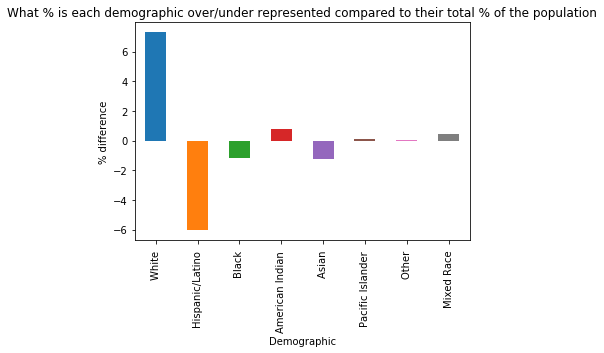

In [12]:
df = pd.DataFrame(allData)
df.columns = ['Demographic','% Represnetation comapred to National %']
df = df.set_index('Demographic')
df.plot.bar(y='% Represnetation comapred to National %',
            legend=False,title= "What % is each demographic over/under represented compared to their total % of the population").set_ylabel("% difference")
df

Much like the Senate, the Electoral College gives a bias towards small states. The 40,000,000 people of California have to share 55 votes (or about 727,000 people per vote) while Wyoming's 3 votes gives 200,000 people per vote. This bias leads to slightly different results to the Senate but slightly more fair.

Part C: The House of Reps

In [13]:
#House
al = district_df.iloc[0].copy()
ca = district_df.iloc[44].copy()
district_df.loc[44] = al
district_df.loc[0] = ca
popPerSenCA = ca['Total']/2

In [14]:
allInfo = []
demographics = ['White','Hispanic/Latino','Black','American Indian','Asian','Pacific Islander','Other','Mixed Race','Total']
for state in range(0,len(district_df)):
    info = []
    voteWeighVsCA = ((district_df.loc[0]['Total'])/(district_df.loc[state]['Total']))
    info.append(district_df.loc[state]['State'])
    for x in demographics:
        info.append(district_df.loc[state][x])
        info.append(district_df.loc[state][x]*voteWeighVsCA)
    allInfo.append(info)
info_df = pd.DataFrame(allInfo)
info_df.columns = ['State','White','White Adj','Hispanic/Latino','Hispanic/Latino Adj','Black','Black Adj','American Indian','American Indian Adj','Asian','Asian Adj','Pacific Islander','Pacific Islander Adj','Other','Other Adj',
                   'Mixed Race','Mixed Race Adj','Total','Total Adj']

In [15]:
dems = ['White Adj','Hispanic/Latino Adj','Black Adj','American Indian Adj','Asian Adj','Pacific Islander Adj','Other Adj','Mixed Race Adj']
res = []
for x in dems:
    print(info_df[x].sum()/info_df['Total Adj'].sum())
    res.append(info_df[x].sum()/info_df['Total Adj'].sum())

0.617587404031
0.174355282754
0.122222167229
0.00635851060318
0.0526828334014
0.00156636802243
0.0021531034202
0.0230743305389


In [16]:
allData = []
dem = ['White ','Hispanic/Latino ','Black ','American Indian ','Asian ','Pacific Islander ','Other ','Mixed Race ']
for x in range(0,len(res)):
    data = []
    print(dem[x] + 'voters have a ' + str((res[x]-percents[x])*100), end='')
    data.append(dem[x])
    data.append((res[x]-percents[x])*100)
    if(res[x]-percents[x] > 0):
        print("% higher", end='')
    else:
        print("% lower", end='')
    print(' representation compared to there actual population within the US')
    allData.append(data)

White voters have a 0.248300290606% higher representation compared to there actual population within the US
Hispanic/Latino voters have a -0.156238630755% lower representation compared to there actual population within the US
Black voters have a -0.0256720644608% lower representation compared to there actual population within the US
American Indian voters have a -0.00910855738268% lower representation compared to there actual population within the US
Asian voters have a -0.0491418086319% lower representation compared to there actual population within the US
Pacific Islander voters have a -3.17363994371e-05% lower representation compared to there actual population within the US
Other voters have a -0.00178720950401% lower representation compared to there actual population within the US
Mixed Race voters have a -0.00632028347199% lower representation compared to there actual population within the US


,% Represnetation comapred to National %
Demographic,
White,0.248300
Hispanic/Latino,-0.156239
Black,-0.025672
American Indian,-0.009109
Asian,-0.049142
Pacific Islander,-0.000032
Other,-0.001787
Mixed Race,-0.006320


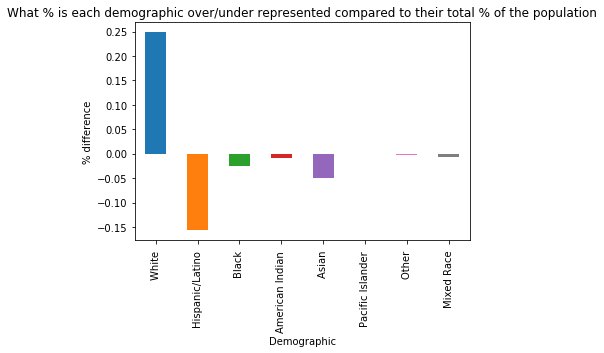

In [17]:
df = pd.DataFrame(allData)
df.columns = ['Demographic','% Represnetation comapred to National %']
df = df.set_index('Demographic')
df.plot.bar(y='% Represnetation comapred to National %',
            legend=False,title= "What % is each demographic over/under represented compared to their total % of the population").set_ylabel("% difference")
df

When looking at the y-axis it is clear that the House of Representatives better represents the population at large. This is because the House of Reps scales districts to the population (mostly). There are even some districts specifically made to give a boost to minority voters due to the Voting Rights Act. However, white people still do have a clear advantage. This is likely because of political reasons. There are several states (such as North Carolina and Penn.) who are currently facing racial gerrymandering cases where they unfairly drew district maps to favor Republicans, who are disproportionately white.